<a href="https://colab.research.google.com/github/virtuel75/avila-analysis/blob/main/notebook/avila_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recuperation des données

In [ ]:
!pip install wget

In [2]:
from os import path
import wget

In [3]:
data_file = 'avila.zip'

## Téléchargement des données

In [4]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip'

if not path.exists(data_file):
  wget.download(url=data_url, out=data_file)

## Extraction des données

In [5]:
from zipfile import ZipFile

In [6]:
# train file
avila_tr_filename = './avila/avila-tr.txt'

# test file
avila_ts_filename = './avila/avila-ts.txt'

In [7]:
if not path.exists(avila_tr_filename) or not path.exists(avila_ts_filename):
  with ZipFile(data_file, 'r') as zip_ref:
      zip_ref.extractall()

# Lecture

In [ ]:
!pip install pandas

In [9]:
import pandas as pd

In [10]:
data_tr = pd.read_csv(avila_tr_filename, '\n', ',', header=None)
data_ts = pd.read_csv(avila_ts_filename, '\n', ',', header=None)

In [11]:
data_tr.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
1444,-3.498799,0.054213,-2.083148,-2.448349,-4.922215,-2.965574,-3.252862,-2.426713,-3.802418,-2.520486,A
6262,-0.326430,-0.079257,0.239183,0.566935,0.261718,-0.349509,0.295677,0.834415,0.438262,-0.360882,E
7255,-0.128929,0.705861,0.413447,2.004055,0.619230,0.273364,-1.629594,0.313539,0.687713,1.519224,Y
2485,-0.091897,0.226939,0.267634,0.024091,0.261718,0.024215,0.484429,-0.308919,-0.029461,-0.126518,H
10258,0.130292,-0.126364,0.377883,0.755362,0.261718,0.439463,0.371178,0.665385,0.157628,0.305381,A


In [12]:
data_ts.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
5132,0.130292,-0.126364,0.271191,0.816262,0.261718,0.480988,0.069175,0.434691,0.064084,0.524821,A
8137,-0.314087,-2.426761,-0.006209,-0.194681,0.261718,1.228436,1.012935,-0.363845,-0.154186,0.646759,A
5930,-0.054866,0.313302,0.054250,0.218427,0.261718,0.647088,0.144676,0.423430,0.313536,0.610653,A
3824,-0.005490,0.760819,-0.095119,-0.016936,0.261718,-1.221530,0.333428,-0.280592,0.313536,-1.151300,F
6478,-0.054866,0.226939,0.320980,-0.905841,0.261718,-0.432558,0.220177,-0.711692,0.407080,-0.390236,H


# Prétraitement

## Renommage des colonnes

In [13]:
# on vérifie d'abord que les données d'entrainement 
# et les données ont la même structure
all(column == True for column in (data_tr.columns == data_ts.columns))

True

In [14]:
columns = [f'f{i+1}' for i in range(10)] + ['class']

data_tr.columns = columns
data_ts.columns = columns

* `f1` :       intercolumnar distance
* `f2` :       upper margin 
* `f3` :       lower margin 
* `f4` :       exploitation 
* `f5` :       row number 
* `f6` :       modular ratio 
* `f7` :       interlinear spacing 
* `f8` :       weight 
* `f9` :       peak number 
* `f10` :      modular ratio/ interlinear spacing
* `class` :
  - A
  - B
  - C
  - D
  - E
  - F
  - G
  - I
  - W
  - X
  - Y

In [15]:
target_attribute = 'class'

## Test des types d'attributs

In [16]:
data_tr.dtypes

f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
f10      float64
class     object
dtype: object

In [17]:
data_ts.dtypes

f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
f10      float64
class     object
dtype: object

Remplacement du type de l'attribut **class** par le type `category`

In [18]:
data_tr[target_attribute] = data_tr[target_attribute].astype('category')
data_ts[target_attribute] = data_ts[target_attribute].astype('category')

In [19]:
data_tr.dtypes

f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
class    category
dtype: object

In [20]:
data_ts.dtypes

f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
class    category
dtype: object

## Test de chevauchements

In [21]:
# on vérifie que les données d'entrainement 
# et les données ne se chevauche pas
len(data_tr.merge(data_ts, how='inner', indicator=False)) == 0

True

In [22]:
data_all = pd.concat([data_tr, data_ts])

## Test des valeurs manquantes

In [23]:
data_all.isnull().any()

f1       False
f2       False
f3       False
f4       False
f5       False
f6       False
f7       False
f8       False
f9       False
f10      False
class    False
dtype: bool

In [24]:
data_all.isna().any()

f1       False
f2       False
f3       False
f4       False
f5       False
f6       False
f7       False
f8       False
f9       False
f10      False
class    False
dtype: bool

## Etudes des attributs

### Etude de l'attribut cible : `class`

In [25]:
# On vérifie que les données d'entrainement comporte 
# bien toutes les types de classe
data_tr[target_attribute].unique() == data_all[target_attribute].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
# affichage du nombre de class
print(f'Nombre de type de classe : {data_tr[target_attribute].nunique()}')

Nombre de type de classe : 12


In [27]:
# Distribution de l'ensemble des données par classe
n_sample_per_target_type = data_all.groupby(target_attribute).size().reset_index()
n_sample_per_target_type.columns = [target_attribute, 'count']
n_sample_per_target_type

,class,count
0,A,8572
1,B,10
2,C,206
3,D,705
4,E,2190
5,F,3923
6,G,893
7,H,1039
8,I,1663
9,W,89


### Etude des autres attribut : `f1` ... `f10`

In [ ]:
!pip install seaborn
!pip install matplotlib

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Résumé statistique

In [30]:
data_all.describe().loc[['mean', 'std', 'min', 'max']]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


#### Correlation des attributs

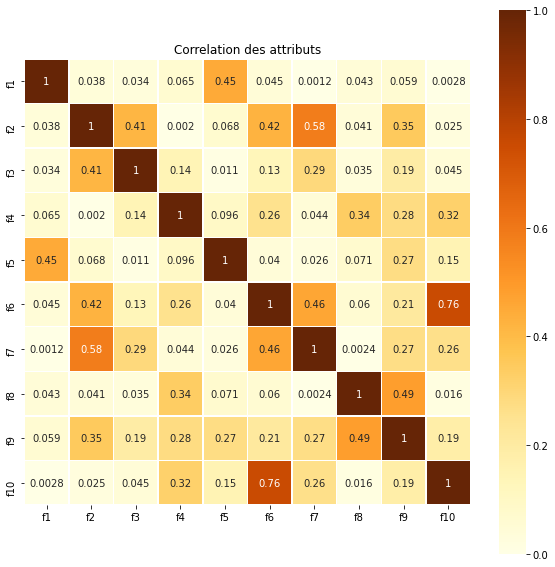

In [31]:
attributes_correlation = data_tr.corr().abs()

plt.figure(figsize=(10, 10))
sns.heatmap(attributes_correlation, vmax=1, vmin=0, annot=True, square=True, linewidths=.5, cmap='YlOrBr')
plt.title('Correlation des attributs')
plt.show()

#### Variances des attributs

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [33]:
input = data_tr.loc[:, data_tr.columns != target_attribute]

In [34]:
input.var(axis=0)

f1      0.982936
f2     15.373210
f3      1.254852
f4      1.017126
f5      0.984170
f6      1.268428
f7      1.725950
f8      1.007026
f9      1.183016
f10     1.014238
dtype: float64

#### Selection des attributs

In [35]:
features_mask = ['f1', 'f2', 'f3', 'f4', 'f5', 'f8', 'f9', 'f10']

# Création des `'input'` & `'output'`

In [36]:
X_train = data_tr.loc[:, data_tr.columns != target_attribute]
X_train = X_train.filter(features_mask)

y_train = data_tr.loc[:, target_attribute]

In [37]:
X_test = data_ts.loc[:, data_ts.columns != target_attribute]
X_test = X_test.filter(features_mask)

y_test = data_ts.loc[:, target_attribute]

# Entrainement des modeles

### Fonctions

In [ ]:
!pip install scikit-learn
!pip install numpy

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve, cross_val_score, GridSearchCV
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

#### Train & test fonctions

In [40]:
@ignore_warnings(category=ConvergenceWarning)
def test_model(model, X, y):
  """
  Tester un modele
  """
  accuracy = cross_val_score(model, X, y, scoring='accuracy', verbose=1)
  avg_accuracy = accuracy.mean()

  return avg_accuracy

In [41]:
@ignore_warnings(category=ConvergenceWarning)
def train_model(model, params, X, y):
  """
  Entrainer un modele
  """
  grid = GridSearchCV(model, params, n_jobs=-1, verbose=1)

  grid.fit(X, y)

  best_params = grid.best_params_
  best_model = grid.best_estimator_

  return best_params, best_model

#### Plot fonctions

In [42]:
def analyse_with_plot(x, train_score, val_score, x_label, title, figsize=(12, 6)):
  """
  Génerer une analyse visuel
  """
  plt.figure(figsize=figsize)
  plt.plot(x, train_score, linestyle='dashed', marker='o', label='train score')
  plt.plot(x, val_score, linestyle='dashed', marker='o', label='validation score')
  plt.xlabel(x_label)
  plt.ylabel('Précision')
  plt.title(title)
  plt.legend()
  plt.grid(b=True, which='major', color='#bdc3c7', linestyle='--')
  plt.show()

In [43]:
def analyse_with_bar(x, y1, y2, x_label, title, figsize=(12, 6)):
  """
  Générer une analyse visuel
  """
  x_values = np.arange(len(x)) 
  barWidth = 0.15

  plt.figure(figsize=(12,6))
  plt.bar(x_values, y1, width=barWidth, label='train score')
  plt.bar(x_values - barWidth, y2, width=barWidth, label='validation score')
  plt.xlabel(x_label)
  plt.ylabel('Précision')
  plt.xticks([r for r in range(len(y1))], x)
  plt.title(title)
  plt.legend()
  plt.show()

## K-NN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_model = KNeighborsClassifier()

### Test du modele par defaut

In [46]:
knn_accuracy = test_model(knn_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [47]:
print(f'Précision:\t', knn_accuracy)

Précision:	 0.7534995206136146


### Recherche des meilleurs parametres

#### Influence de `k` (nombre de voisins)

In [48]:
knn_k_range = np.arange(1, 40)

In [49]:
knn_k_train_score, knn_k_val_score = validation_curve(knn_model, X_train, y_train, 'n_neighbors', knn_k_range, verbose=1, n_jobs=-1)

knn_k_train_score = knn_k_train_score.mean(axis=1)
knn_k_val_score = knn_k_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  3.0min finished


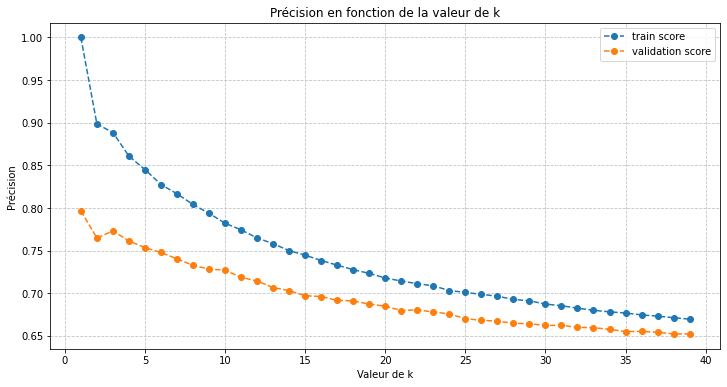

In [50]:
analyse_with_plot(knn_k_range,
                  knn_k_train_score, 
                  knn_k_val_score,
                  'Valeur de k',
                  'Précision en fonction de la valeur de k')

In [51]:
knn_k_range = np.arange(1, 5)

#### Influence de `weights`

In [52]:
knn_weights_range = ['uniform', 'distance']

In [53]:
knn_weights_train_score, knn_weights_val_score = validation_curve(knn_model, X_train, y_train, 'weights', knn_weights_range, verbose=1, n_jobs=-1)

knn_weights_train_score = knn_weights_train_score.mean(axis=1)
knn_weights_val_score = knn_weights_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


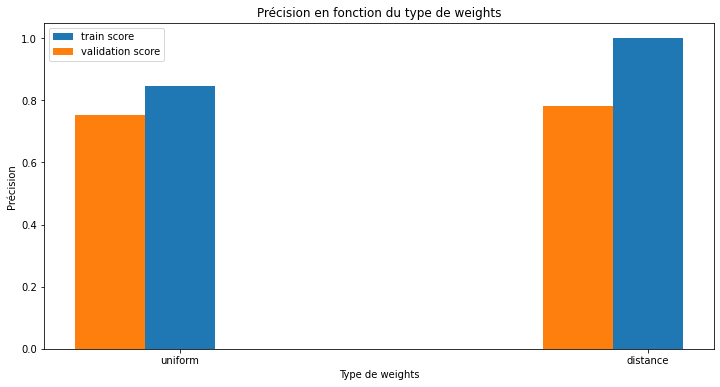

In [54]:
analyse_with_bar(knn_weights_range, 
                 knn_weights_train_score, 
                 knn_weights_val_score,
                 'Type de weights',
                 'Précision en fonction du type de weights')

In [55]:
knn_weights_range = ['distance']

#### Influence de `p`

In [56]:
knn_p_range = np.arange(1, 10)

In [57]:
knn_p_train_score, knn_p_val_score = validation_curve(knn_model, X_train, y_train, 'p', knn_p_range, verbose=1, n_jobs=-1)

knn_p_train_score = knn_p_train_score.mean(axis=1)
knn_p_val_score = knn_p_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.3min finished


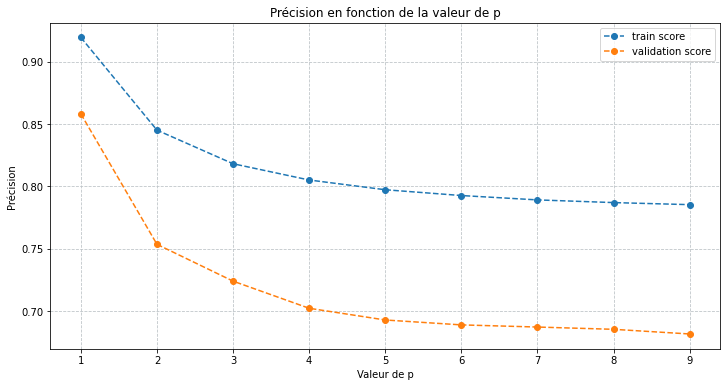

In [58]:
analyse_with_plot(knn_p_range, 
                  knn_p_train_score, 
                  knn_p_val_score,
                  'Valeur de p',
                  'Précision en fonction de la valeur de p')

In [59]:
knn_p_range = np.arange(1, 3)

### Recherche du meilleur modele

In [60]:
knn_parameters = {
    'n_neighbors': knn_k_range, 
    'weights': knn_weights_range, 
    'p': knn_p_range
}

knn_best_param, knn_best_model = train_model(knn_model, knn_parameters, X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.4s finished


In [61]:
print("Meilleurs paramètres trouvés :")
print(knn_best_param)

Meilleurs paramètres trouvés :
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [62]:
knn_model = knn_best_model

### Comparaison

In [63]:
knn_accuracy_old = knn_accuracy

In [64]:
knn_accuracy = test_model(knn_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [65]:
knn_accuracy_diffrence = round(((knn_accuracy - knn_accuracy_old) * 100) / knn_accuracy_old, 2)
knn_accuracy_diffrence_signe = '-' if knn_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', knn_accuracy_old)
print(f'Nouvelle précision:\t', knn_accuracy, f'({knn_accuracy_diffrence_signe}{knn_accuracy_diffrence}%)')

Ancienne précision:	 0.7534995206136146
Nouvelle précision:	 0.889837008628955 (+18.09%)


## Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr_model = LogisticRegression()

### Test du modele par defaut

In [68]:
lr_accuracy = test_model(lr_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s finished


In [69]:
print(f'Précision:\t', lr_accuracy)

Précision:	 0.5405560882070949


### Recherche des meilleurs parametres

#### Influence de `max_iter`

In [70]:
lr_max_iter_range = np.arange(100, 1000, 100)

In [71]:
lr_max_iter_train_score, lr_max_iter_val_score = validation_curve(lr_model, X_train, y_train, 'max_iter', lr_max_iter_range, verbose=1, n_jobs=-1)

lr_max_iter_train_score = lr_max_iter_train_score.mean(axis=1)
lr_max_iter_val_score = lr_max_iter_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min finished


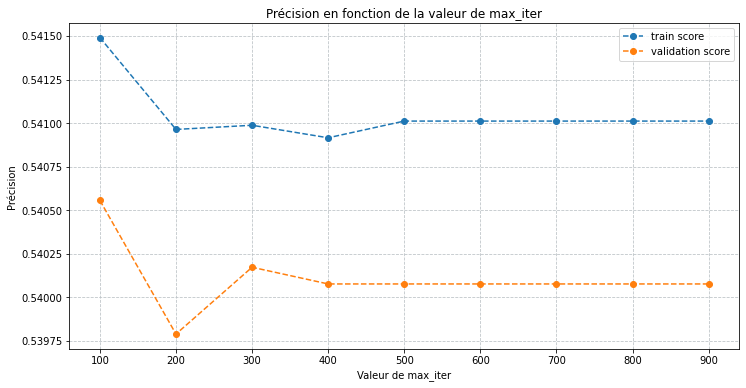

In [72]:
analyse_with_plot(lr_max_iter_range,
                  lr_max_iter_train_score, 
                  lr_max_iter_val_score,
                  'Valeur de max_iter',
                  'Précision en fonction de la valeur de max_iter')

In [73]:
lr_max_iter_range = np.array([100])

#### Influence de `c`

In [74]:
lr_c_range = np.logspace(-3, 2, 6)

In [75]:
lr_c_train_score, lr_c_val_score = validation_curve(lr_model, X_train, y_train, 'C', lr_c_range, verbose=1, n_jobs=-1)

lr_c_train_score = lr_c_train_score.mean(axis=1)
lr_c_val_score = lr_c_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.1s finished


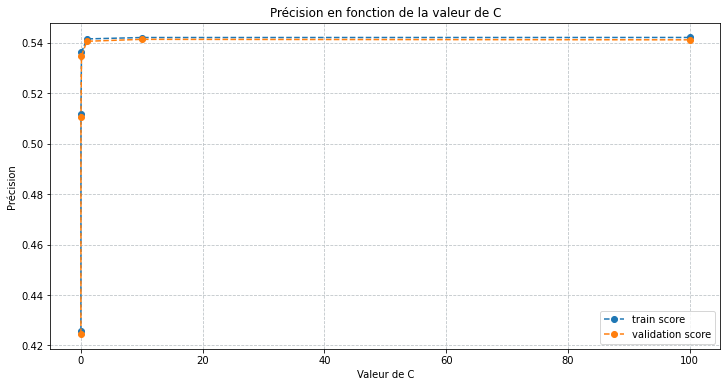

In [76]:
analyse_with_plot(lr_c_range,
                  lr_c_train_score, 
                  lr_c_val_score,
                  'Valeur de C',
                  'Précision en fonction de la valeur de C')

In [77]:
lr_c_range = np.logspace(0, 2, 3)

#### Influence de `solver`

In [78]:
lr_solver_range = ['newton-cg', 'sag', 'saga', 'lbfgs']

In [79]:
lr_solver_train_score, lr_solver_val_score = validation_curve(lr_model, X_train, y_train, 'solver', lr_solver_range, verbose=1, n_jobs=-1)

lr_solver_train_score = lr_solver_train_score.mean(axis=1)
lr_solver_val_score = lr_solver_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.3s finished


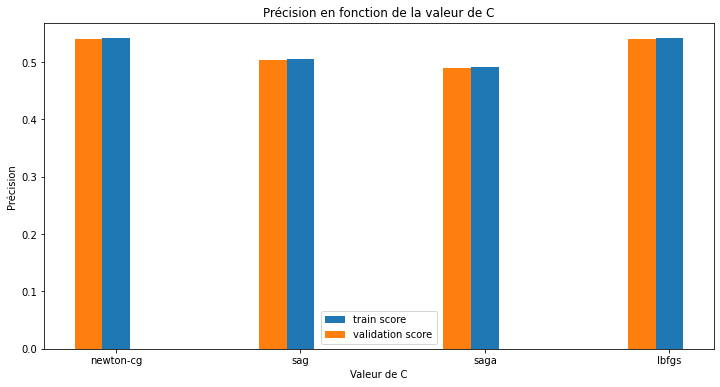

In [80]:
analyse_with_bar(lr_solver_range,
                 lr_solver_train_score, 
                 lr_solver_val_score,
                 'Valeur de C',
                 'Précision en fonction de la valeur de C')

In [81]:
lr_solver_type = ['newton-cg', 'lbfgs']

### Recherche du meilleur modele

In [82]:
lr_parameters = {
    'max_iter': lr_max_iter_range, 
    'C': lr_c_range, 
    'solver': lr_solver_range
}

lr_best_param, lr_best_model = train_model(lr_model, lr_parameters, X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


In [83]:
print("Meilleurs paramètres trouvés :")
print(lr_best_param)

Meilleurs paramètres trouvés :
{'C': 10.0, 'max_iter': 100, 'solver': 'lbfgs'}


In [84]:
lr_model = lr_best_model

### Comparaison

In [85]:
lr_accuracy_old = lr_accuracy

In [86]:
lr_accuracy = test_model(lr_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished


In [87]:
lr_accuracy_diffrence = round(((lr_accuracy - lr_accuracy_old) * 100) / lr_accuracy_old, 2)
lr_accuracy_diffrence_signe = '-' if lr_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', lr_accuracy_old)
print(f'Nouvelle précision:\t', lr_accuracy, f'({lr_accuracy_diffrence_signe}{lr_accuracy_diffrence}%)')

Ancienne précision:	 0.5405560882070949
Nouvelle précision:	 0.5413231064237776 (+0.14%)


## Support Vector Machine (SVM)

In [88]:
from sklearn.svm import SVC

In [89]:
svm_model = SVC()

### Test du modele par defaut

In [90]:
svm_accuracy = test_model(svm_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.3s finished


In [91]:
print(f'Précision:\t', svm_accuracy)

Précision:	 0.653307766059444


### Recherche des meilleurs parametres

#### Influence du `kernel`

In [92]:
svm_kernel_range = ['rbf', 'sigmoid', 'linear']

In [93]:
svm_kernel_train_score, svm_kernel_val_score = validation_curve(svm_model, X_train, y_train, 'kernel', svm_kernel_range, verbose=1, n_jobs=-1)

svm_kernel_train_score = svm_kernel_train_score.mean(axis=1)
svm_kernel_val_score = svm_kernel_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


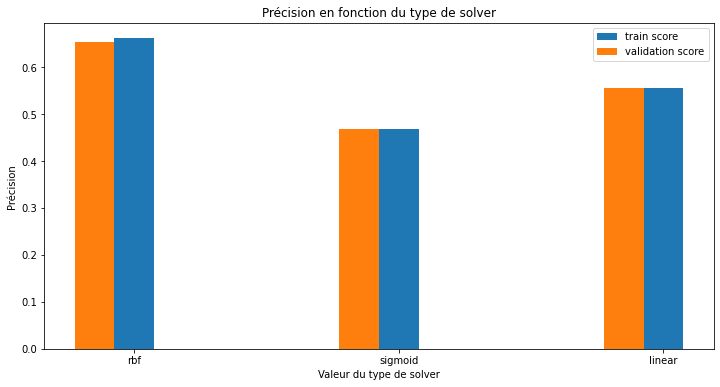

In [94]:
analyse_with_bar(svm_kernel_range,
                 svm_kernel_train_score, 
                 svm_kernel_val_score,
                 'Valeur du type de solver',
                 'Précision en fonction du type de solver')

In [95]:
svm_kernel_range = ['rbf']

#### Influence du `gamma`

In [96]:
svm_gamma_range = np.logspace(-3, 2, 6)

In [97]:
svm_gamma_train_score, svm_gamma_val_score = validation_curve(svm_model, X_train, y_train, 'gamma', svm_gamma_range, verbose=1, n_jobs=-1)

svm_gamma_train_score = svm_gamma_train_score.mean(axis=1)
svm_gamma_val_score = svm_gamma_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished


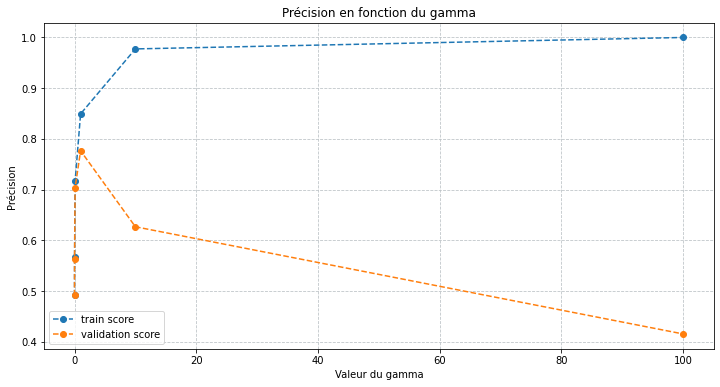

In [98]:
analyse_with_plot(svm_gamma_range,
                  svm_gamma_train_score, 
                  svm_gamma_val_score,
                  'Valeur du gamma',
                  'Précision en fonction du gamma')

In [99]:
svm_gamma_range = np.logspace(-1, 0, 2)

#### Influence de `C`

In [100]:
svm_c_range = np.logspace(1, 4, 4)

In [101]:
svm_c_train_score, svm_c_val_score = validation_curve(svm_model, X_train, y_train, 'C', svm_c_range, verbose=1, n_jobs=-1)

svm_c_train_score = svm_c_train_score.mean(axis=1)
svm_c_val_score = svm_c_val_score.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.6min finished


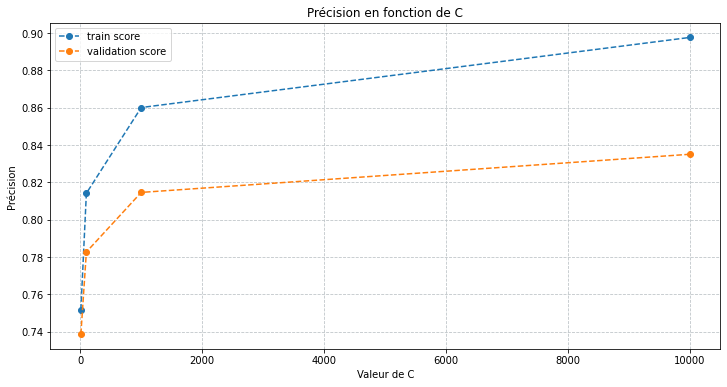

In [102]:
analyse_with_plot(svm_c_range,
                  svm_c_train_score, 
                  svm_c_val_score,
                  'Valeur de C',
                  'Précision en fonction de C')

In [103]:
svm_c_range = np.logspace(2, 4, 3)

### Recherche du meilleur modele

In [104]:
svm_parameters = {
    'kernel': svm_kernel_range, 
    'gamma': svm_gamma_range, 
    'C': svm_c_range
}

svm_best_param, svm_best_model = train_model(svm_model, svm_parameters, X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


In [105]:
print("Meilleurs paramètres trouvés :")
print(svm_best_param)

Meilleurs paramètres trouvés :
{'C': 10000.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [106]:
svm_model = svm_best_model

### Comparaison

In [107]:
svm_accuracy_old = svm_accuracy

In [108]:
svm_accuracy = test_model(svm_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


In [109]:
svm_accuracy_diffrence = round(((svm_accuracy - svm_accuracy_old) * 100) / svm_accuracy_old, 2)
svm_accuracy_diffrence_signe = '-' if svm_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', svm_accuracy_old)
print(f'Nouvelle précision:\t', svm_accuracy, f'({svm_accuracy_diffrence_signe}{svm_accuracy_diffrence}%)')

Ancienne précision:	 0.653307766059444
Nouvelle précision:	 0.8574304889741132 (+31.24%)


## Random forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier()

### Test du modele par defaut

In [112]:
rf_accuracy = test_model(rf_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished


In [113]:
print(f'Précision:\t', rf_accuracy)

Précision:	 0.9910834132310642


### Recherche des meilleurs parametres

#### Influence de `n_estimators`

In [114]:
rf_estimators_range = np.arange(100, 1100, 200)

In [115]:
rf_estimators_train_score, rf_estimators_val_score = validation_curve(rf_model, X_train, y_train, 'n_estimators', rf_estimators_range, verbose=1)

rf_estimators_train_score = rf_estimators_train_score.mean(axis=1)
rf_estimators_val_score = rf_estimators_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.3min finished


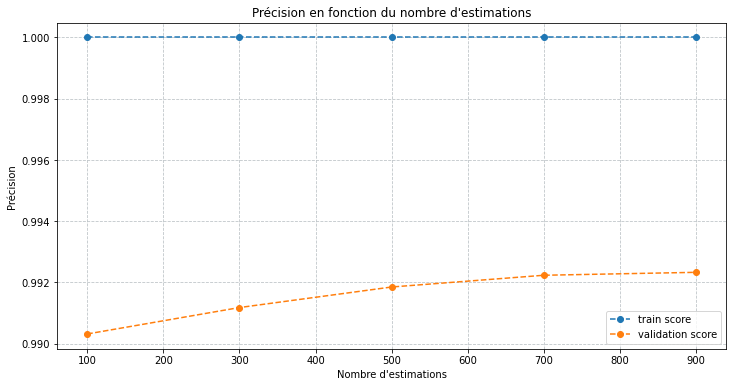

In [116]:
analyse_with_plot(rf_estimators_range,
                  rf_estimators_train_score, 
                  rf_estimators_val_score,
                  'Nombre d\'estimations',
                  'Précision en fonction du nombre d\'estimations')

In [117]:
rf_estimators_range = [700]

#### Influence de `criterion`

In [118]:
rf_criterion_range = ['gini', 'entropy']

In [119]:
rf_criterion_train_score, rf_criterion_val_score = validation_curve(rf_model, X_train, y_train, 'criterion', rf_criterion_range, verbose=1)

rf_criterion_train_score = rf_criterion_train_score.mean(axis=1)
rf_criterion_val_score = rf_criterion_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.2s finished


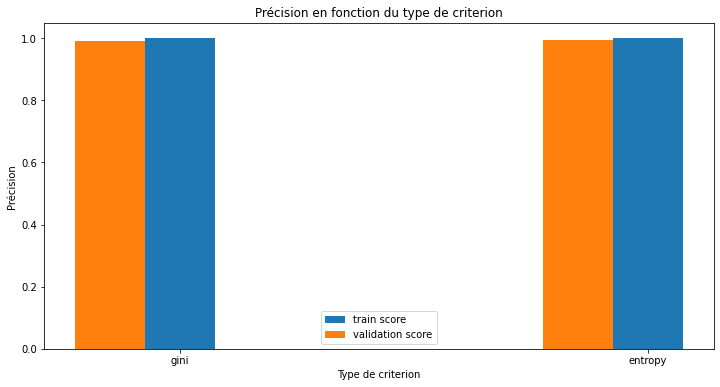

In [120]:
analyse_with_bar(rf_criterion_range,
                 rf_criterion_train_score, 
                 rf_criterion_val_score,
                 'Type de criterion',
                 'Précision en fonction du type de criterion')

In [121]:
rf_criterion_range = ['gini', 'entropy']

#### Influence de `max_depth`

In [122]:
rf_depth_range = np.arange(10, 40, 5)

In [123]:
rf_depth_train_score, rf_depth_val_score = validation_curve(rf_model, X_train, y_train, 'max_depth', rf_depth_range, verbose=1)

rf_depth_train_score = rf_depth_train_score.mean(axis=1)
rf_depth_val_score = rf_depth_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   45.1s finished


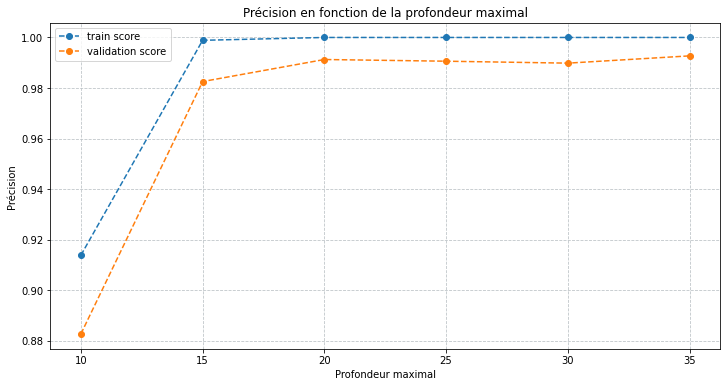

In [124]:
analyse_with_plot(rf_depth_range,
                  rf_depth_train_score, 
                  rf_depth_val_score,
                  'Profondeur maximal',
                  'Précision en fonction de la profondeur maximal')

In [125]:
rf_depth_range = [20]

#### Influence de `min_samples_split`

In [126]:
rf_min_samples_split_range = list(np.arange(2, 11, 2))

In [127]:
rf_min_samples_split_train_score, rf_min_samples_split_val_score = validation_curve(rf_model, X_train, y_train, 'min_samples_split', rf_min_samples_split_range, verbose=1)

rf_min_samples_split_train_score = rf_min_samples_split_train_score.mean(axis=1)
rf_min_samples_split_val_score = rf_min_samples_split_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   38.6s finished


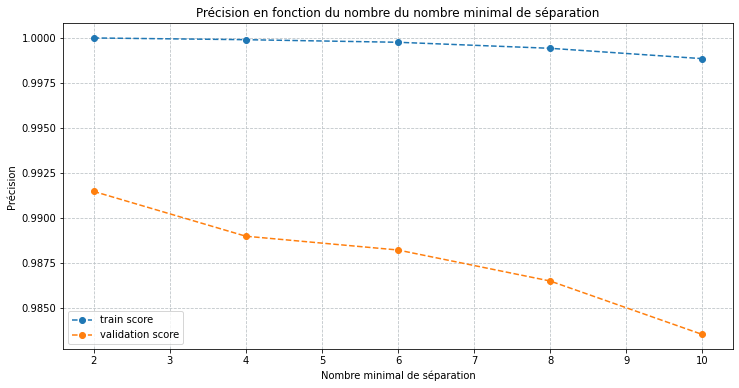

In [128]:
analyse_with_plot(rf_min_samples_split_range,
                  rf_min_samples_split_train_score, 
                  rf_min_samples_split_val_score,
                  'Nombre minimal de séparation',
                  'Précision en fonction du nombre du nombre minimal de séparation')

In [129]:
rf_min_samples_split_range = [2]

#### Influence de `min_samples_leaf`

In [130]:
rf_min_samples_leaf_range = list(np.arange(1, 5, 1))

In [131]:
rf_min_samples_leaf_train_score, rf_min_samples_leaf_val_score = validation_curve(rf_model, X_train, y_train, 'min_samples_leaf', rf_min_samples_leaf_range, verbose=1)

rf_min_samples_leaf_train_score = rf_min_samples_leaf_train_score.mean(axis=1)
rf_min_samples_leaf_val_score = rf_min_samples_leaf_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   30.9s finished


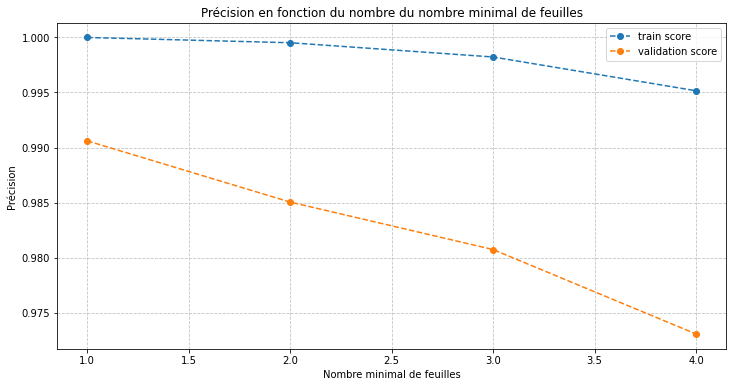

In [132]:
analyse_with_plot(rf_min_samples_leaf_range,
                  rf_min_samples_leaf_train_score, 
                  rf_min_samples_leaf_val_score,
                  'Nombre minimal de feuilles',
                  'Précision en fonction du nombre du nombre minimal de feuilles')

In [133]:
rf_min_samples_leaf_range = [1]

#### Influence de `max_features`

In [134]:
rf_max_features_range = ['auto', 'sqrt']

In [135]:
rf_max_features_train_score, rf_max_features_val_score = validation_curve(rf_model, X_train, y_train, 'max_features', rf_max_features_range, verbose=1)

rf_max_features_train_score = rf_max_features_train_score.mean(axis=1)
rf_max_features_val_score = rf_max_features_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.8s finished


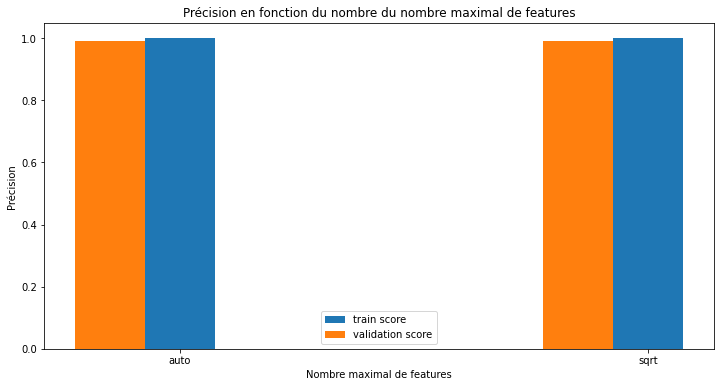

In [136]:
analyse_with_bar(rf_max_features_range,
                 rf_max_features_train_score, 
                 rf_max_features_val_score,
                 'Nombre maximal de features',
                 'Précision en fonction du nombre du nombre maximal de features')

In [137]:
rf_max_features_range = ['auto', 'sqrt']

### Recherche du meilleur modele

In [138]:
rf_parameters = {
    'n_estimators': rf_estimators_range,
    'criterion': rf_criterion_range,
    'max_depth': rf_depth_range,
    'min_samples_split': rf_min_samples_split_range,
    'min_samples_leaf': rf_min_samples_leaf_range,
    'max_features': rf_max_features_range
}

rf_best_param, rf_best_model = train_model(rf_model, rf_parameters, X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.5min finished


In [139]:
print("Meilleurs paramètres trouvés :")
print(rf_best_param)

Meilleurs paramètres trouvés :
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


In [140]:
rf_model = rf_best_model

### Comparaison

In [141]:
rf_accuracy_old = rf_accuracy

In [142]:
rf_accuracy = test_model(rf_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


In [143]:
rf_accuracy_diffrence = round(((rf_accuracy - rf_accuracy_old) * 100) / rf_accuracy_old, 2)
rf_accuracy_diffrence_signe = '-' if rf_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', rf_accuracy_old)
print(f'Nouvelle précision:\t', rf_accuracy, f'({rf_accuracy_diffrence_signe}{rf_accuracy_diffrence}%)')

Ancienne précision:	 0.9910834132310642
Nouvelle précision:	 0.9941514860977948 (+0.31%)


## Decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt_model = DecisionTreeClassifier()

### Test du model par defaut

In [146]:
dt_accuracy = test_model(dt_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [147]:
print(f'Précision:\t', dt_accuracy)

Précision:	 0.9699904122722914


### Recherche des meilleures parametres

#### Influence de `criterion`

In [148]:
dt_criterion_range = ['gini', 'entropy']

In [149]:
dt_criterion_train_score, dt_criterion_val_score = validation_curve(dt_model, X_train, y_train, 'criterion', dt_criterion_range, verbose=1)

dt_criterion_train_score = dt_criterion_train_score.mean(axis=1)
dt_criterion_val_score = dt_criterion_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


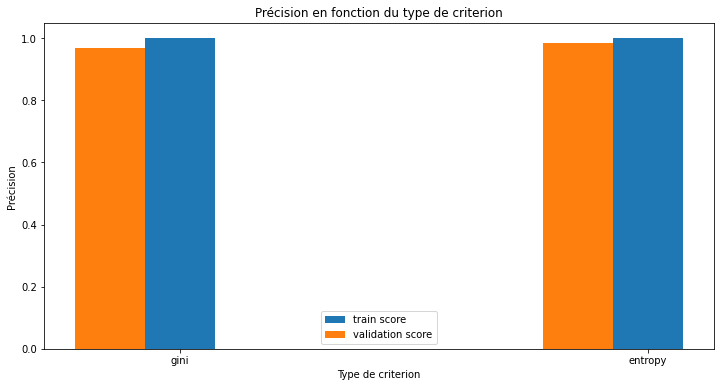

In [150]:
analyse_with_bar(dt_criterion_range,
                 dt_criterion_train_score, 
                 dt_criterion_val_score,
                 'Type de criterion',
                 'Précision en fonction du type de criterion')

In [151]:
dt_criterion_range = ['gini', 'entropy']

#### Influence de `max_depth`

In [152]:
dt_depth_range = np.arange(10, 40, 5)

In [153]:
dt_depth_train_score, dt_depth_val_score = validation_curve(dt_model, X_train, y_train, 'max_depth', dt_depth_range, verbose=1)

dt_depth_train_score = dt_depth_train_score.mean(axis=1)
dt_depth_val_score = dt_depth_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.3s finished


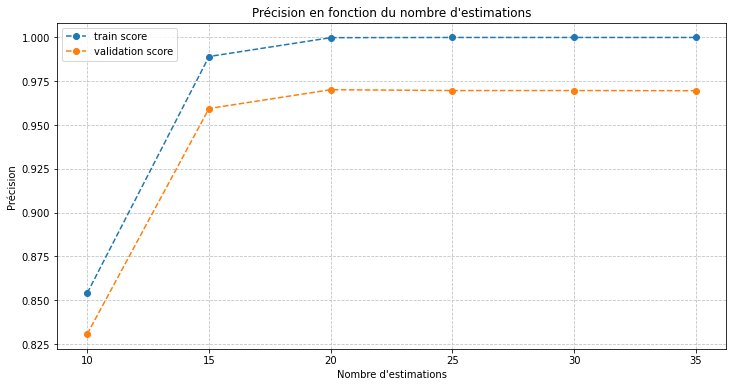

In [154]:
analyse_with_plot(dt_depth_range,
                  dt_depth_train_score, 
                  dt_depth_val_score,
                  'Nombre d\'estimations',
                  'Précision en fonction du nombre d\'estimations')

In [155]:
dt_depth_range = np.arange(20, 40, 5)

#### Influence de `min_samples_split`

In [156]:
dt_min_samples_split_range = list(np.arange(2, 11, 2))

In [157]:
dt_min_samples_split_train_score, dt_min_samples_split_val_score = validation_curve(dt_model, X_train, y_train, 'min_samples_split', dt_min_samples_split_range, verbose=1)

dt_min_samples_split_train_score = dt_min_samples_split_train_score.mean(axis=1)
dt_min_samples_split_val_score = dt_min_samples_split_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.9s finished


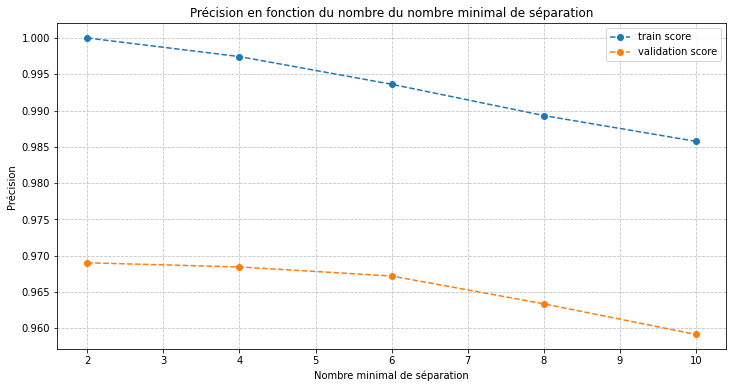

In [158]:
analyse_with_plot(dt_min_samples_split_range,
                  dt_min_samples_split_train_score, 
                  dt_min_samples_split_val_score,
                  'Nombre minimal de séparation',
                  'Précision en fonction du nombre du nombre minimal de séparation')

In [159]:
dt_min_samples_split_range = [2]

#### Influence de `min_samples_leaf`

In [160]:
dt_min_samples_leaf_range = list(np.arange(1, 5, 1))

In [161]:
dt_min_samples_leaf_train_score, dt_min_samples_leaf_val_score = validation_curve(dt_model, X_train, y_train, 'min_samples_leaf', dt_min_samples_leaf_range, verbose=1)

dt_min_samples_leaf_train_score = dt_min_samples_leaf_train_score.mean(axis=1)
dt_min_samples_leaf_val_score = dt_min_samples_leaf_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.5s finished


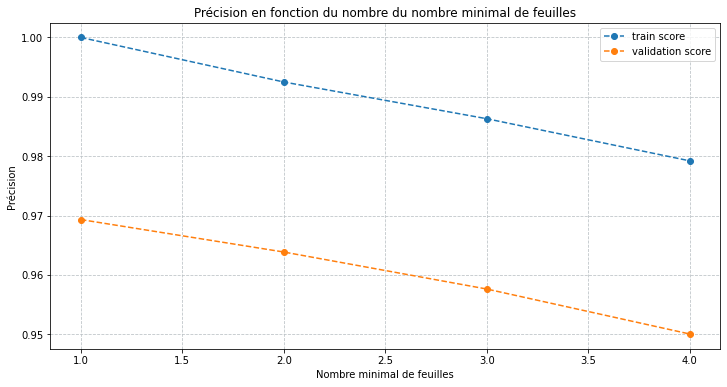

In [162]:
analyse_with_plot(dt_min_samples_leaf_range,
                  dt_min_samples_leaf_train_score, 
                  dt_min_samples_leaf_val_score,
                  'Nombre minimal de feuilles',
                  'Précision en fonction du nombre du nombre minimal de feuilles')

In [163]:
rf_min_samples_leaf_range = [1]

### Recherche du meilleur modele

In [164]:
dt_parameters = {
    'criterion': rf_criterion_range,
    'max_depth': rf_depth_range,
    'min_samples_split': rf_min_samples_split_range,
    'min_samples_leaf': rf_min_samples_leaf_range,
}

dt_best_param, dt_best_model = train_model(dt_model, dt_parameters, X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


In [165]:
print("Meilleurs paramètres trouvés :")
print(dt_best_param)

Meilleurs paramètres trouvés :
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [166]:
dt_model = dt_best_model

### Comparaison

In [167]:
dt_accuracy_old = dt_accuracy

In [168]:
dt_accuracy = test_model(dt_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [169]:
dt_accuracy_diffrence = round(((dt_accuracy - dt_accuracy_old) * 100) / dt_accuracy_old, 2)
dt_accuracy_diffrence_signe = '-' if dt_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', dt_accuracy_old)
print(f'Nouvelle précision:\t', dt_accuracy, f'({dt_accuracy_diffrence_signe}{dt_accuracy_diffrence}%)')

Ancienne précision:	 0.9699904122722914
Nouvelle précision:	 0.9845637583892618 (+1.5%)


## Naive Bayes

In [170]:
from sklearn.naive_bayes import GaussianNB

In [171]:
nb_model = GaussianNB()

### Test du model par defaut

In [172]:
nb_accuracy = test_model(nb_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [173]:
print(f'Précision:\t', nb_accuracy)

Précision:	 0.2792905081495686


### Recherche de meilleurs parametres

#### Influence de `var_smoothing`

In [174]:
nb_smoothing_range = np.arange(1, 10, 1)

In [175]:
nb_smoothing_train_score, nb_smoothing_val_score = validation_curve(nb_model, X_train, y_train, 'var_smoothing', nb_smoothing_range, verbose=1)

nb_smoothing_train_score = nb_smoothing_train_score.mean(axis=1)
nb_smoothing_val_score = nb_smoothing_val_score.mean(axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.4s finished


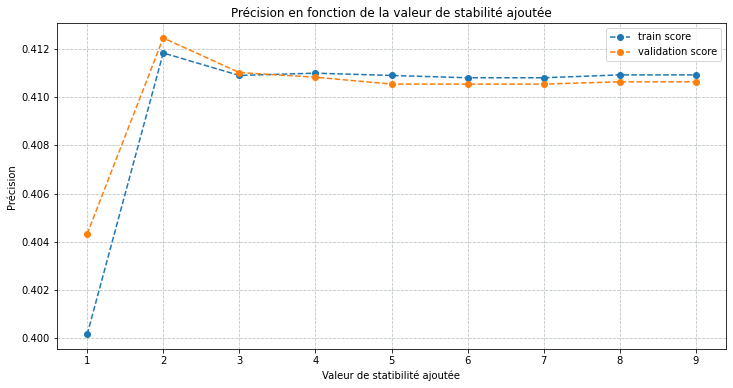

In [176]:
analyse_with_plot(nb_smoothing_range,
                  nb_smoothing_train_score, 
                  nb_smoothing_val_score,
                  'Valeur de statibilité ajoutée',
                  'Précision en fonction de la valeur de stabilité ajoutée')

In [177]:
nb_smoothing_range = np.arange(1, 10, 1)

### Recherche du meilleur modele

In [178]:
nb_parameters = {
    'var_smoothing': nb_smoothing_range
}

nb_best_param, nb_best_model = train_model(nb_model, nb_parameters, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


In [179]:
print("Meilleurs paramètres trouvés :")
print(nb_best_param)

Meilleurs paramètres trouvés :
{'var_smoothing': 2}


In [180]:
nb_model = nb_best_model

### Comparaison

In [181]:
nb_accuracy_old = nb_accuracy

In [182]:
nb_accuracy = test_model(nb_model, X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [183]:
nb_accuracy_diffrence = round(((nb_accuracy - nb_accuracy_old) * 100) / nb_accuracy_old, 2)
nb_accuracy_diffrence_signe = '-' if nb_accuracy_diffrence < 0 else '+'

print(f'Ancienne précision:\t', nb_accuracy_old)
print(f'Nouvelle précision:\t', nb_accuracy, f'({nb_accuracy_diffrence_signe}{nb_accuracy_diffrence}%)')

Ancienne précision:	 0.2792905081495686
Nouvelle précision:	 0.412464046021093 (+47.68%)


# Evaluation des modeles

## Enumération des modeles

In [244]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [184]:
model_enum = {
    'knn' : (knn_model, 'K-NN'),
    'lr'  : (lr_model, 'Logstic Regression'),
    'svm' : (svm_model, 'SVM'),
    'rf'  : (rf_model, 'Random Forest'),
    'dt'  : (dt_model, 'Decision Tree'),
    'nb'  : (nb_model, 'Naive Bayes')
}

## Test des modeles

In [233]:
@ignore_warnings(category=ConvergenceWarning)
def final_test(model, x1, x2, y1, y2):
  model.fit(x1, y1)

  predictions = model.predict(x2)
  accuracy = accuracy_score(y2, predictions)

  return accuracy, predictions

In [234]:
# test les modele avec les données d'entrainement

model_result = {}

for model_name in model_enum:
  model, _ = model_enum.get(model_name)

  accuracy, predictions = final_test(model, X_train, X_test, y_train, y_test)

  model_result[model_name] = (accuracy, predictions)

## Récupération du meilleur modele

In [235]:
best_result = None

for key in model_result.keys():
  accuracy, predictions = model_result[key]

  _, model_name = model_enum.get(key)

  if best_result is None:
    best_result = (key, model_name, accuracy, predictions)
  else:
    if best_result[2] < accuracy:
      best_result = (key, model_name, accuracy, predictions)

  name = model_name.ljust(18, ' ')

  print(f'{key}\t', f'{name}\t', f'précision : {round(accuracy, 6)}')

knn	 K-NN              	 précision : 0.900929
lr	 Logstic Regression	 précision : 0.538565
svm	 SVM               	 précision : 0.868449
rf	 Random Forest     	 précision : 0.996167
dt	 Decision Tree     	 précision : 0.98879
nb	 Naive Bayes       	 précision : 0.410654


In [243]:
best_model_id, best_model_name, best_model_accuracy, best_model_predictions = best_result

accuracy_displayed = round(best_model_accuracy * 100, 2)
print(f'Meilleur model : {best_model_name} - score : {accuracy_displayed}%')

best_model, _ = model_enum.get(best_model_id)

Meilleur model : Random Forest - score : 99.62%


In [237]:
conf_matrix = confusion_matrix(y_test, best_model_predictions)

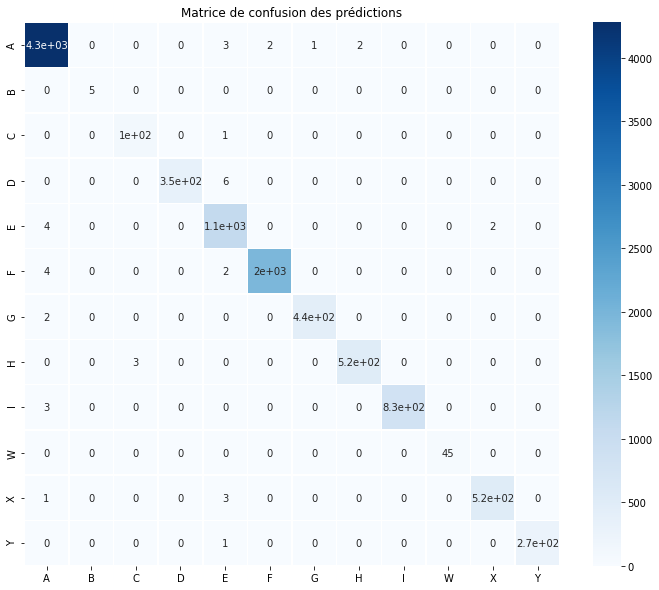

In [238]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
df_conf_matrix = pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

plt.figure(figsize=(12, 10))
sns.heatmap(df_conf_matrix, annot=True, linewidths=.5, cmap='Blues')
plt.title('Matrice de confusion des prédictions')
plt.show()

# Enregistrement

In [245]:
import joblib

In [247]:
model_filename = 'model.sav'

joblib.dump(best_model, model_filename, compress=3)

['model.sav']

# Chargement

In [248]:
loaded_model = joblib.load(model_filename)

In [249]:
# resultat attendu : I
# 0.624046, -0.071406, 0.221401, -0.586246, 0.887365, -0.889332, -1.25209, 0.116938, 1.373706, 0.021326, I
x = [[0.624046, -0.071406, 0.221401, -0.586246, 0.887365, 0.116938, 1.373706, 0.021326]]

predictions = loaded_model.predict(x)
probability = loaded_model.predict_proba(x)

results = list(zip(predictions, [max(p) for p in probability]))

print('Prédictions :')
for r in results:
  print(f'- classe: {r[0]}\t', f'précision: {r[1]}')

Prédictions :
- classe: I	 précision: 1.0
